In [ ]:
from fbprophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly
from fbprophet.diagnostics import performance_metrics
from fbprophet.diagnostics import cross_validation
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from datetime import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
save_fig = True #False
labels = 'Mean Operative Temperature'
# labels = 'Electricity:Facility [J](Hourly)'
# labels = 'DistrictCooling:Facility [J](Hourly)'
# labels = 'DistrictHeating:Facility [J](Hourly)'
season = "spring"
train_time = 24*7-1
forcast_time = 12 #hour
test_time = 24 #1days
predict =[]
reference=[]
figure_path = "/content/drive/MyDrive/Building"

In [ ]:
# heating_period1 = (0,2880) # Jan 1st to Apr 30th
# cooling_period  = (12780, 6888) # May 1st to Oct 14th
# heating_period2 = (5888,8760) # Oct 15th to Dec 31th

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data4prediction.csv")
df['Date/Time'] = df['Date/Time'].apply(lambda d:datetime.fromtimestamp(d))

df_winter=pd.concat([df[len(df)-744:-1], df[0:1416]], ignore_index=True, sort=False)
df_spring=df[1417:3625]
df_summer=df[3636:5809]
df_autumn=df[5809:len(df)-745]

if season == "winter":
  data_df=df_winter.copy()
elif season == "spring":
  data_df=df_spring.copy()
elif season == "summer":
  data_df=df_summer.copy()
elif season == "autumn":
  data_df=df_autumn.copy()
else:
  raise ValueError

time_label = []

In [ ]:
print(len(df_winter),len(df_spring),len(df_summer),len(df_autumn))

2159 2208 2173 2206


In [ ]:
data = [data_df['Date/Time'].to_list(),
        data_df[labels].to_list(),
        data_df['Environment:Site Outdoor Air Drybulb Temperature [C](Hourly)'].to_list(),
        data_df['Environment:Site Outdoor Air Dewpoint Temperature [C](Hourly)'].to_list(),
        data_df['Environment:Site Direct Solar Radiation Rate per Area [W/m2](Hourly)'].to_list(),
        data_df['Environment:Site Diffuse Solar Radiation Rate per Area [W/m2](Hourly)'].to_list(),
        data_df['Date/Time'].apply(lambda D: D.isoweekday()>5).to_list(),
        data_df['Date/Time'].apply(lambda D: D.isoweekday()<=5).to_list()
        ]

column_label =np.array(['ds','y','temp_out','dewpoint','rad_direct','rad_diffuse','Weekend','Workday'])
temp=np.array(data).transpose()
dfTemp = pd.DataFrame(temp,columns=column_label)

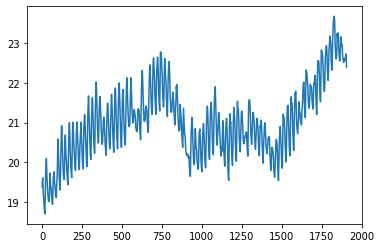

In [ ]:
plt.figure()
plt.plot(data_df[labels][300:-1].to_list())

In [ ]:
# dfTemp=pd.
# dfTemp['ds'] = data_df['Date/Time']
# dfTemp['y'] = data_df['Mean Operative Temperature']
# dfTemp['temp_out'] = data_df['Environment:Site Outdoor Air Drybulb Temperature [C](Hourly)']
# dfTemp['dewpoint'] = data_df['Environment:Site Outdoor Air Dewpoint Temperature [C](Hourly)']
# dfTemp['rad_direct'] = data_df['Environment:Site Direct Solar Radiation Rate per Area [W/m2](Hourly)']
# dfTemp['rad_diffuse'] = data_df['Environment:Site Diffuse Solar Radiation Rate per Area [W/m2](Hourly)']
# dfTemp['Weekend'] = data_df['Date/Time'].apply(lambda D: D.isoweekday()>5)
# dfTemp['Workday'] = data_df['Date/Time'].apply(lambda D: D.isoweekday()<=5)

In [ ]:
TEM_sample = None
fcst_sample = None

In [ ]:
bias = 400
for i in range(test_time):
  i= i+bias
  dfTempTr = dfTemp.loc[i: train_time+i]
  TEM = Prophet()
  TEM.add_seasonality(name='weekend', period=7, fourier_order=3, condition_name='Weekend')
  TEM.add_seasonality(name='workday', period=7, fourier_order=3, condition_name='Workday')
  # TEM.add_regressor('temp_out')
  # TEM.add_regressor('dewpoint')
  # TEM.add_regressor('rad_direct')
  # TEM.add_regressor('rad_diffuse')
  TEM.fit(dfTempTr)

  future = TEM.make_future_dataframe(periods=forcast_time, freq='H')
  dfTempTe = dfTemp.loc[i: train_time+forcast_time+i].reset_index()
  future['Weekend'] = dfTempTe['Weekend']
  future['Workday'] = dfTempTe['Workday']
  # future['temp_out'] = dfTempTe['temp_out']
  # future['dewpoint'] = dfTempTe['dewpoint']
  # future['rad_direct'] = dfTempTe['rad_direct']
  # future['rad_diffuse'] = dfTempTe['rad_diffuse']

  fcst = TEM.predict(future)
  predict.append(fcst.tail(forcast_time)["yhat"].to_list())
  reference.append(dfTemp.loc[train_time+i+1:train_time+i+forcast_time]['y'].to_list())
  time_label.append(dfTemp.loc[train_time+i+1:train_time+i+forcast_time]['ds'].to_list())
  if i == 0:
    TEM_sample=TEM
    fcst_sample = fcst
  print("Finished interation: "+str(i))

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Finished interation: 400


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Finished interation: 401


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Finished interation: 402


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Finished interation: 403


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Finished interation: 404


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Finished interation: 405


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Finished interation: 406


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Finished interation: 407


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Finished interation: 408


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Finished interation: 409


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Finished interation: 410


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Finished interation: 411


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Finished interation: 412


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Finished interation: 413


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Finished interation: 414


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Finished interation: 415


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Finished interation: 416


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Finished interation: 417


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Finished interation: 418


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Finished interation: 419


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Finished interation: 420


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Finished interation: 421


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Finished interation: 422
Finished interation: 423


In [ ]:
predict_np = np.array(predict)
reference_np = np.array(reference)
time_label_np= np.array(time_label)

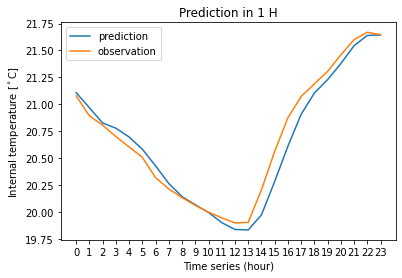

In [ ]:
x_index = []
for i in range(len(predict_np[:,0])):
  x_index.append(i)
plt.figure()
plt.plot(predict_np[:,0],label="prediction")
plt.plot(reference_np[:,0],label="observation")
plt.xticks(x_index)#,time_label_np[:,0]
# plt.xticks(rotation=90)
plt.xlabel("Time series (hour)")
plt.ylabel("Internal temperature [$^\circ$C]")
plt.title("Prediction in 1 H")
plt.legend()
if save_fig==True and labels == 'Mean Operative Temperature':
  plt.savefig(figure_path+'Prophet_temperature_'+season+'.png')

In [ ]:
print(len(time_label_np[:,0]))

24


In [ ]:
print(mse(predict_np[:,0],reference_np[:,0])) #/(3.6e6**2)

0.01275389908678177


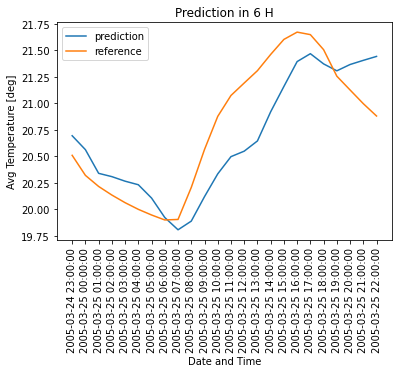

In [ ]:
plt.figure()
plt.plot(predict_np[:,5],label="prediction")
plt.plot(reference_np[:,5],label="reference")
plt.xticks(x_index,time_label_np[:,6])
plt.xticks(rotation=90)
plt.xlabel("Date and Time")
plt.ylabel("Avg Temperature [deg]")
plt.title("Prediction in 6 H")
plt.legend()

In [ ]:
print(mse(predict_np[:,5],reference_np[:,5]))

0.13364762960352414


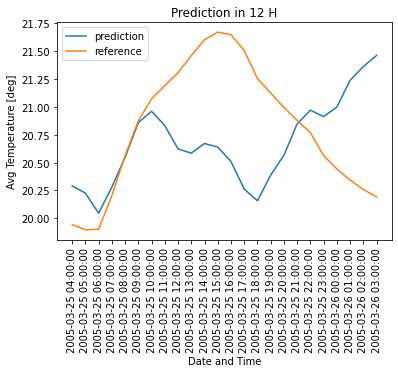

In [ ]:
plt.figure()
plt.plot(predict_np[:,11],label="prediction")
plt.plot(reference_np[:,11],label="reference")
plt.xticks(x_index,time_label_np[:,11])
plt.xticks(rotation=90)
plt.xlabel("Date and Time")
plt.ylabel("Avg Temperature [deg]")
plt.title("Prediction in 12 H")
plt.legend()

In [ ]:
print(mse(predict_np[:,11],reference_np[:,11]))

0.5168746871410429


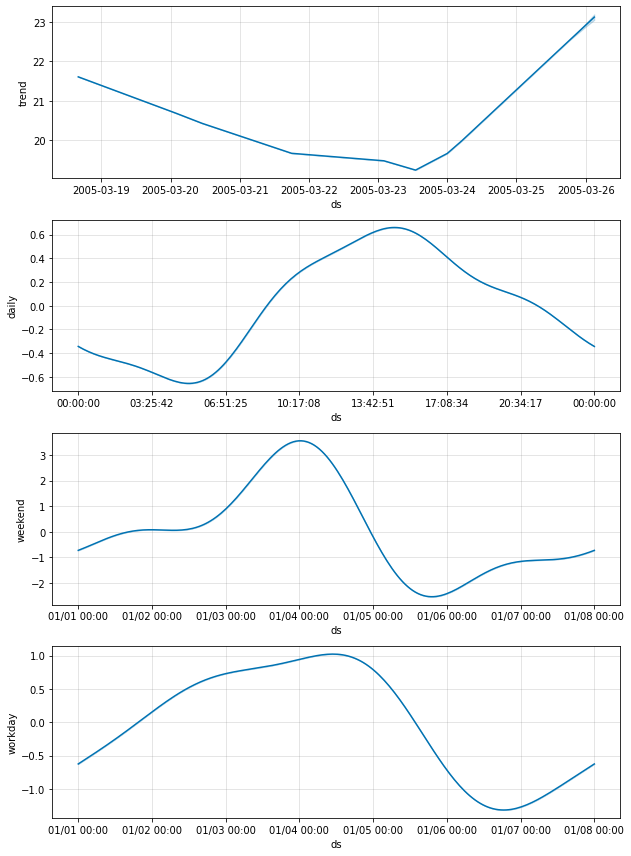

In [ ]:
fig = TEM.plot_components(fcst)

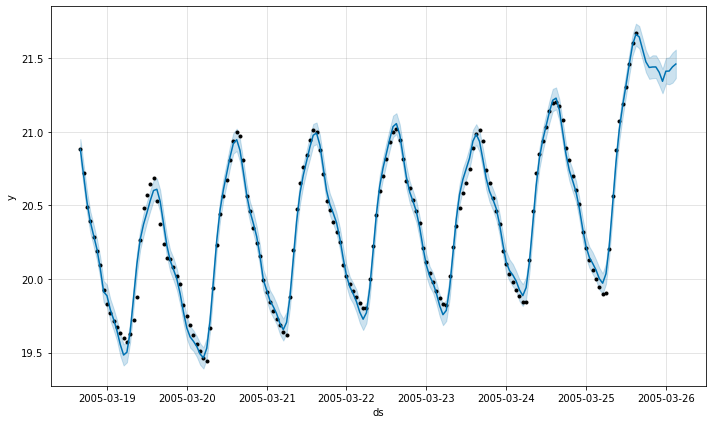

In [ ]:
fig1 = TEM.plot(fcst)